In [1]:
import pandas as pd 

In [2]:
# create DataFrame

df = pd.read_csv("AI_Human.csv")
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


# 1. Basic Cleaning

In [3]:
# drop Duplicates and NaN Values

print(f"Length DataFrame: {len(df)}")
df = df.drop_duplicates()
df = df.dropna()
print(f"Length DataFrame without Dups / NaNs: {len(df)}")

Length DataFrame: 487235
Length DataFrame without Dups / NaNs: 487235


In [4]:
from helper_cleaning import *
import random 

random_idx = random.choice(df.index)

sample_text = df.loc[random_idx, "text"]

# print random sample
print(sample_text)

 Problems are an opportunity to grow and learn.

Did you know that problems can be a catalyst for personal growth and development?

Overcoming challenges helps to build resilience and self confidence. When faced with hard times, individuals are forced to confront their weaknesses and limitations, which can ultimately lead to greater strength and self awareness. By persevering through adversity, individuals can develop a deeper understanding of themselves and their abilities, and gain valuable life lessons that can be applied in the future.

Moreover, problems can also help individuals to identify areas for improvement and make positive changes in their lives. When faced with a problem, individuals are often forced to reevaluate their priorities and make adjustments to their routines and habits in order to overcome the challenge. This process of reflection and introspection can lead to personal growth and transformation, as individuals become more intentional and deliberate in their dec

In [5]:
cleaned_sample_text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(remove_emojis(sample_text)))))

# print cleaned random sample
print(cleaned_sample_text)

problems are an opportunity to grow and learn did you know that problems can be a catalyst for personal growth and development overcoming challenges helps to build resilience and self confidence when faced with hard times individuals are forced to confront their weaknesses and limitations which can ultimately lead to greater strength and self awareness by persevering through adversity individuals can develop a deeper understanding of themselves and their abilities and gain valuable life lessons that can be applied in the future moreover problems can also help individuals to identify areas for improvement and make positive changes in their lives when faced with a problem individuals are often forced to reevaluate their priorities and make adjustments to their routines and habits in order to overcome the challenge this process of reflection and introspection can lead to personal growth and transformation as individuals become more intentional and deliberate in their decision making and a

In [6]:
from tqdm import tqdm

clean_texts = []

# generate cleaned texts, tqdm for progress bar
for text in tqdm(df["text"].values):
    clean_texts.append(
        remove_mult_spaces(
            filter_chars(clean_hashtags(strip_all_entities(remove_emojis(text))))
        )
    )

100%|██████████| 487235/487235 [42:59<00:00, 188.87it/s] 


In [7]:
# new Column for cleaned Texts

df["text_clean"] = clean_texts 
df.head()

,text,generated,text_clean
0,Cars. Cars have been around since they became ...,0.0,cars cars have been around since they became f...
1,Transportation is a large necessity in most co...,0.0,transportation is a large necessity in most co...
2,"""America's love affair with it's vehicles seem...",0.0,americas love affair with its vehicles seems t...
3,How often do you ride in a car? Do you drive a...,0.0,how often do you ride in a car do you drive a ...
4,Cars are a wonderful thing. They are perhaps o...,0.0,cars are a wonderful thing they are perhaps on...


In [8]:
text_len = []

# get word counts for each text, tqdm for progress bar
for text in tqdm(df["text_clean"].values):
    length = len(text.split())
    text_len.append(length)

100%|██████████| 487235/487235 [00:04<00:00, 99939.81it/s] 


In [9]:
# new column for word counts

df["word_count"] = text_len
df.head()

,text,generated,text_clean,word_count
0,Cars. Cars have been around since they became ...,0.0,cars cars have been around since they became f...,584
1,Transportation is a large necessity in most co...,0.0,transportation is a large necessity in most co...,462
2,"""America's love affair with it's vehicles seem...",0.0,americas love affair with its vehicles seems t...,742
3,How often do you ride in a car? Do you drive a...,0.0,how often do you ride in a car do you drive a ...,686
4,Cars are a wonderful thing. They are perhaps o...,0.0,cars are a wonderful thing they are perhaps on...,863


In [11]:
from transformers import RobertaTokenizerFast

tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")

In [13]:
token_len = []

# get token counts for each text, tqdm for progress bar
for text in tqdm(df["text_clean"].values):
    tokens = tokenizer.encode(text, truncation=False, add_special_tokens=True, max_length=2024)
    token_len.append(len(tokens))

100%|██████████| 487235/487235 [06:34<00:00, 1236.43it/s]


In [14]:
df["token_count"] = token_len
df.head()

,text,generated,text_clean,word_count,token_count
0,Cars. Cars have been around since they became ...,0.0,cars cars have been around since they became f...,584,641
1,Transportation is a large necessity in most co...,0.0,transportation is a large necessity in most co...,462,507
2,"""America's love affair with it's vehicles seem...",0.0,americas love affair with its vehicles seems t...,742,810
3,How often do you ride in a car? Do you drive a...,0.0,how often do you ride in a car do you drive a ...,686,739
4,Cars are a wonderful thing. They are perhaps o...,0.0,cars are a wonderful thing they are perhaps on...,863,987


In [16]:
df = df.sort_values(by="token_count", ascending=False)
df.head()

,text,generated,text_clean,word_count,token_count
821,"To tohe stoatoe and tohe stoatoe's countory, t...",0.0,to tohe stoatoe and tohe stoatoes countory toh...,1360,2226
228278,Phones & driving\n\nI strongly agree with cell...,0.0,phones driving i strongly agree with cell phon...,1652,1814
388784,Phones & driving\n\nI strongly agree with cell...,0.0,phones driving i strongly agree with cell phon...,1648,1784
54778,I thought it might be boring and a lot of work...,0.0,i thought it might be boring and a lot of work...,1656,1766
307861,I thought it might be boring and a lot of work...,0.0,i thought it might be boring and a lot of work...,1668,1754


In [17]:
# see some infos about the DataFrame

df.describe()

,generated,word_count,token_count
count,487235.000000,487235.000000,487235.000000
mean,0.372383,392.432902,415.823802
std,0.483440,168.258425,177.383303
min,0.000000,0.000000,2.000000
25%,0.000000,277.000000,295.000000
50%,0.000000,362.000000,384.000000
75%,1.000000,471.000000,499.000000
max,1.000000,1668.000000,2226.000000


# What we see?

|       | word_count    | token_count   |
|-------|---------------|---------------|
| count | 487235.000000 | 487235.000000 |
| mean  | 392.432902    | 415.823802    |
| min   | 0.000000      | 2.000000      |
| max   | 1668.000000   | 2226.000000   |



In [29]:
# word count min is 0, lets check it!

df.tail(100)

,text,generated,text_clean,word_count,token_count
15970,"Dear TEACHER_NAME,\n\nI WRITE THIS LETTER TO S...",0.0,dear teachername i write this letter to said t...,48,55
131436,In my opinion technology is important. It his ...,1.0,in my opinion technology is important it his m...,51,55
255047,"Nowadays, Dictionaries seem to become a main t...",1.0,nowadays dictionaries seem to become a main to...,50,55
185266,Everyone knows: histories make men wise; poem ...,1.0,everyone knows histories make men wise poem wi...,53,55
20806,Everyone know: histories make men wise; poem w...,1.0,everyone know histories make men wise poem wit...,53,55
...,...,...,...,...,...
2384,],1.0,,0,2
78110,,1.0,,0,2
81000,,1.0,,0,2
78298,\n\n,1.0,,0,2


In [30]:
# drop the last 100 entries, so word, token count > 50
df = df.iloc[:-100]
df.tail()

,text,generated,text_clean,word_count,token_count
472130,"Nowadays, Dictionaries seem to become a main t...",1.0,nowadays dictionaries seem to become a main to...,50,55
372783,"Dear TEACHER_NAME,\n\nI WRITE THIS BETTER TO S...",0.0,dear teachername i write this better to said t...,48,55
151029,It is needless to say that the media provides ...,1.0,it is needless to say that the media provides ...,53,55
322861,Everyone Now: histories mate men wise; poem wi...,1.0,everyone now histories mate men wise poem witt...,53,55
95985,As people climb the ladder of success their id...,1.0,as people climb the ladder of success their id...,52,55


In [90]:
df_token_1024 = df[df["token_count"] < 1025]
df_token_512 = df[df["token_count"] < 513]

In [56]:
df_token_1024.head()

,text,generated,text_clean,word_count,token_count
137121,Imagine you are Hitting on the bench a your te...,0.0,imagine you are hitting on the bench a your te...,946,1024
314475,Since the school system was developed the main...,0.0,since the school system was developed the main...,1004,1024
98062,"As the word 'summer' enters AOU mind, the thou...",0.0,as the word summer enters aou mind the thought...,974,1024
247703,What kinds of things happen at your house? Is ...,0.0,what kinds of things happen at your house is i...,997,1024
68787,Distance learning is a form of learning that a...,0.0,distance learning is a form of learning that a...,990,1024


In [57]:
df_token_512.head()

,text,generated,text_clean,word_count,token_count
30617,"""Driverless cars"" have emerged as one of the ...",1.0,driverless cars have emerged as one of the mos...,489,512
49318,Phones and Driving\n\nThe use of cell phones w...,0.0,phones and driving the use of cell phones whil...,497,512
428885,Cell phone use Should not be legal while drivi...,0.0,cell phone use should not be legal while drivi...,493,512
182934,Students should have a choice about their time...,0.0,students should have a choice about their time...,488,512
49464,"In the United States, car wrecks because of di...",0.0,in the united states car wrecks because of dis...,491,512


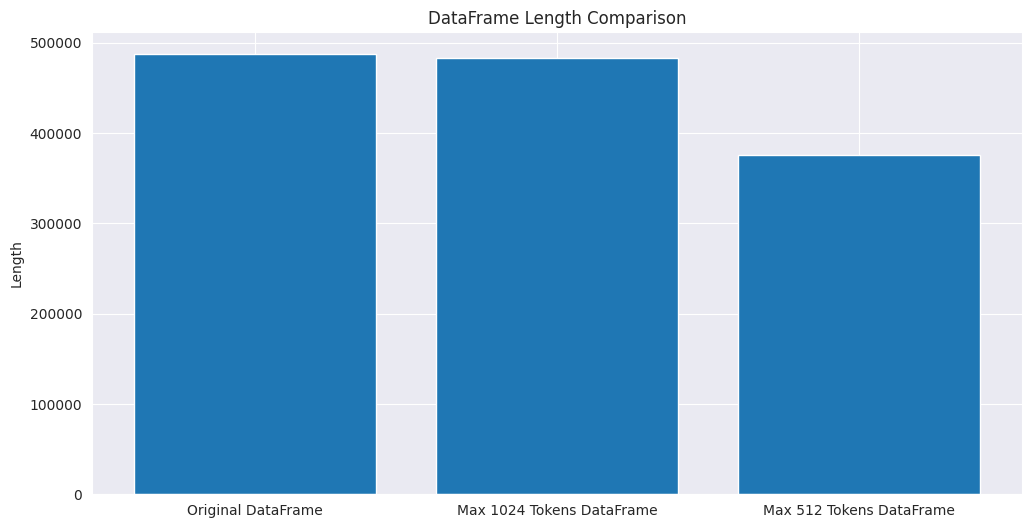

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("darkgrid")

lengths = {
    'Original DataFrame': len(df),
    'Max 1024 Tokens DataFrame': len(df_token_1024),
    'Max 512 Tokens DataFrame': len(df_token_512)
}

# names
names = list(lengths.keys())

# values
values = list(lengths.values())

# generate bar plot 
plt.figure(figsize=(12, 6))  
plt.bar(names, values) 
plt.title('DataFrame Length Comparison') 
plt.ylabel('Length')
plt.show()

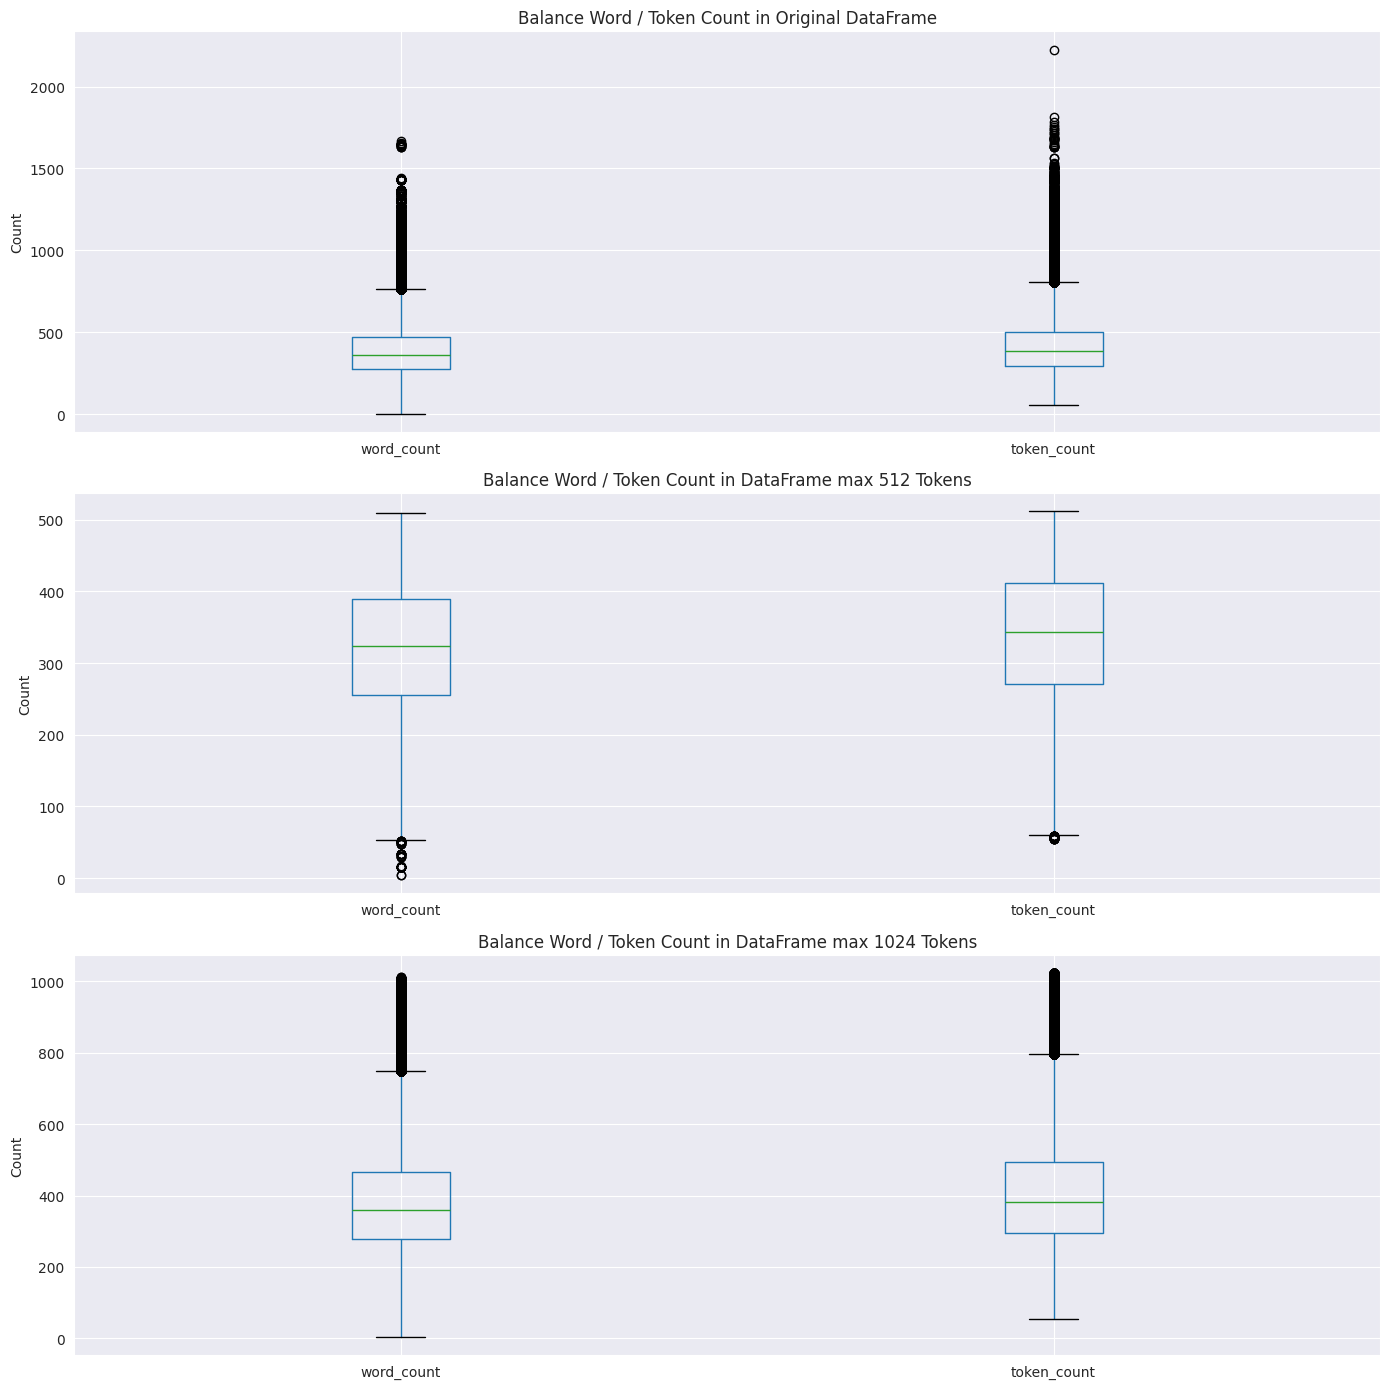

In [70]:
dataframes = [df, df_token_512, df_token_1024]
dataframe_names = ["Original DataFrame", "DataFrame max 512 Tokens", "DataFrame max 1024 Tokens"]

# plot boxplots to check balance within dataframes
plt.figure(figsize=(14, 14))
for i, dataframe in enumerate(dataframes):
    plt.subplot(3, 1, i + 1)
    dataframe[['word_count', 'token_count']].boxplot()
    plt.title(f'Balance Word / Token Count in {dataframe_names[i]}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

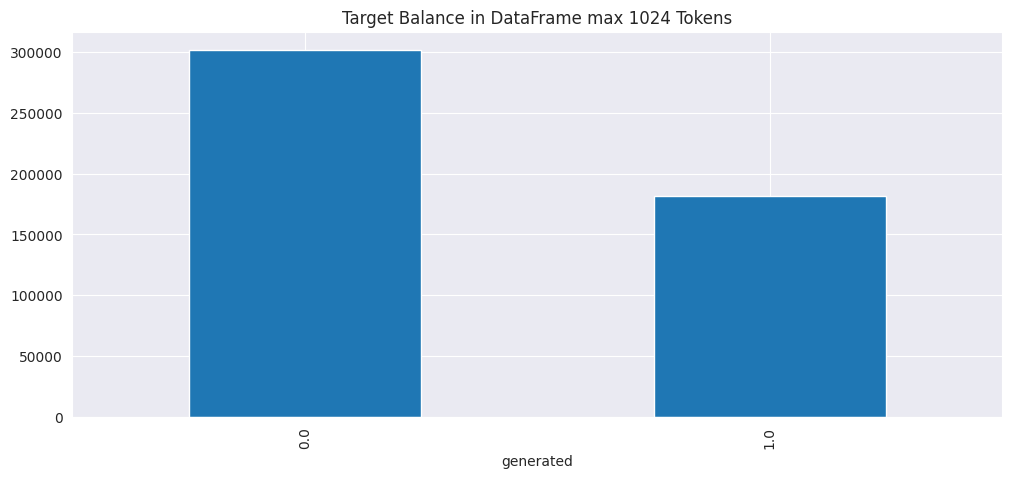

In [81]:
# plot target value counts 1024 Tokens DataFrame
df_token_1024["generated"].value_counts().plot(kind="bar", figsize=(12, 5), title="Target Balance in DataFrame max 1024 Tokens")
plt.show()

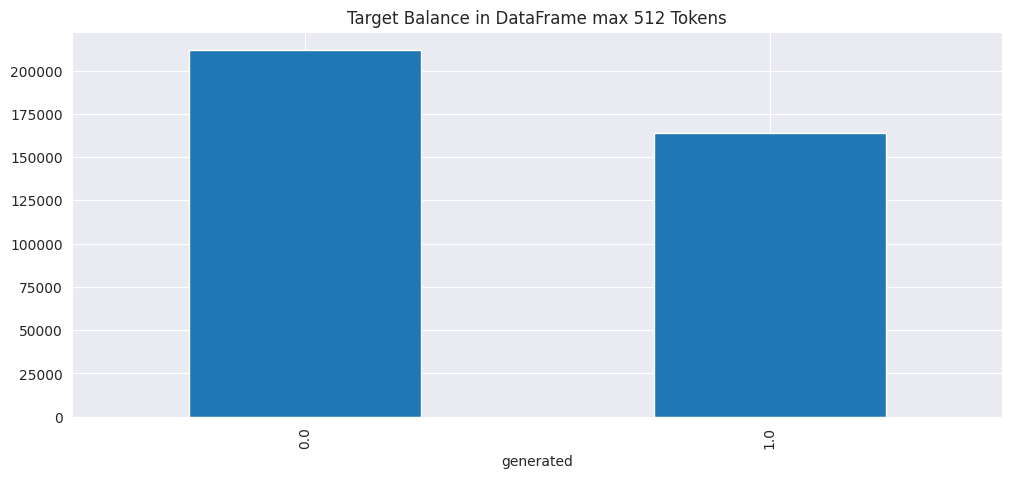

In [82]:
# plot target value counts 512 Tokens DataFrame
df_token_512["generated"].value_counts().plot(kind="bar", figsize=(12, 5), title="Target Balance in DataFrame max 512 Tokens")
plt.show()

# We will balance them with Oversampling after train/test split!

In [83]:
df_token_512.head()

,text,generated,text_clean,word_count,token_count
30617,"""Driverless cars"" have emerged as one of the ...",1.0,driverless cars have emerged as one of the mos...,489,512
49318,Phones and Driving\n\nThe use of cell phones w...,0.0,phones and driving the use of cell phones whil...,497,512
428885,Cell phone use Should not be legal while drivi...,0.0,cell phone use should not be legal while drivi...,493,512
182934,Students should have a choice about their time...,0.0,students should have a choice about their time...,488,512
49464,"In the United States, car wrecks because of di...",0.0,in the united states car wrecks because of dis...,491,512


In [91]:
# drop unimportant columns
df_token_512 = df_token_512.drop(columns=["text", "word_count", "token_count"])
df_token_512.head()

,generated,text_clean
30617,1.0,driverless cars have emerged as one of the mos...
49318,0.0,phones and driving the use of cell phones whil...
428885,0.0,cell phone use should not be legal while drivi...
182934,0.0,students should have a choice about their time...
49464,0.0,in the united states car wrecks because of dis...


In [92]:
# rename and switch columns
df_token_512 = df_token_512.rename(columns={'text_clean': 'text', 'generated': 'target'})[['text', 'target']]
df_token_512.head()

,text,target
30617,driverless cars have emerged as one of the mos...,1.0
49318,phones and driving the use of cell phones whil...,0.0
428885,cell phone use should not be legal while drivi...,0.0
182934,students should have a choice about their time...,0.0
49464,in the united states car wrecks because of dis...,0.0


In [93]:
# shuffle the dataframe before saving, reset the index
df_token_512 = df_token_512.sample(frac=1, random_state=42).reset_index(drop=True)
df_token_512.head()

,text,target
0,introduction hi im a scientist at nasa and im ...,1.0
1,la mona lisa was created by one of the best dr...,0.0
2,have you ever heard of the seagoing cowboys pr...,0.0
3,online schooling has become increasingly popul...,1.0
4,many people and other scientists believe that ...,0.0


In [96]:
# save max 512 tokens dataframe
df_token_512.to_csv("text_512_tokens.csv")

In [94]:
# drop unimportant columns, rename and switch columns, shuffle the dataframe before saving, reset the index
df_token_1024 = df_token_1024.drop(columns=["text", "word_count", "token_count"])
df_token_1024 = df_token_1024.rename(columns={'text_clean': 'text', 'generated': 'target'})[['text', 'target']]
df_token_1024 = df_token_1024.sample(frac=1, random_state=42).reset_index(drop=True)
df_token_1024.head()

,text,target
0,the electoral college is broken ane with anoth...,0.0
1,having your own car can be great but its hurti...,0.0
2,title embracing carfree cities a sustainable a...,1.0
3,i thing that meditation and mindfulness practi...,1.0
4,i think you should john the seagoing cowboys p...,0.0


In [97]:
# save max 1024 tokens dataframe
df_token_1024.to_csv("text_1024_tokens.csv")